<a href="https://colab.research.google.com/github/XINYI1024/Facial-Expression-Recognition/blob/main/%E3%83%AC%E3%83%9D%E3%83%BC%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

１．動画の読み込み

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/dataset/videos"

# 1. 動画の読み込み
r_video = cv2.VideoCapture(path + "/People - 84973.mp4")

# 動画の基本情報を取得する
width = int(r_video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(r_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = r_video.get(cv2.CAP_PROP_FPS)
frame_count = int(r_video.get(cv2.CAP_PROP_FRAME_COUNT))

# 情報を出力する
print(f"動画の幅: {width}ピクセル")
print(f"動画の高さ: {height}ピクセル")
print(f"FPS: {fps}")
print(f"総フレーム数: {frame_count}")

# キャプチャを解放する
r_video.release()

動画の幅: 1280ピクセル
動画の高さ: 720ピクセル
FPS: 25.0
総フレーム数: 241


２．サムネイル画像の作成

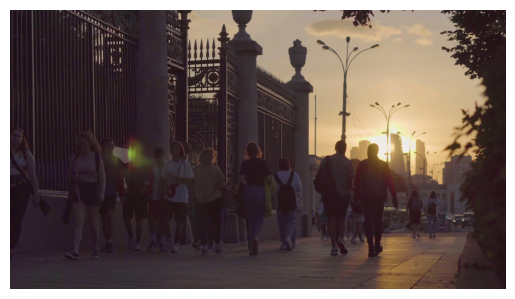

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/dataset/videos/"
output_path = "/content/drive/MyDrive/Colab Notebooks/dataset/images/output/"

r_video = cv2.VideoCapture(path + "People - 84973.mp4")

# 最初のフレームを読み込む
ret, frame = r_video.read()

if ret:
    # BGRからRGBに変換する
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # サムネイル画像を保存する
    cv2.imwrite(output_path + "6322111_People_thumb.jpg", frame)

    # サムネイル画像を表示する
    plt.imshow(rgb_frame)
    plt.axis('off')
    plt.show()

# キャプチャを解放する
r_video.release()

３．ファイル名のパース

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def parse_filename(filename):
    # ファイル名から拡張子を除去する
    name_without_ext = filename.rsplit('.', 1)[0]
    # タイトルとIDを分離する
    title, id = name_without_ext.split(' - ')
    return title, id

# テスト用のファイル名
filenames = ["People - 84973.mp4", "Cat - 66004.mp4"]

for filename in filenames:
    title, id = parse_filename(filename)
    print(f"Title: {title}")
    print(f"ID: {id}")

Title: People
ID: 84973
Title: Cat
ID: 66004


４．二値化と動画の保存

In [ ]:
import cv2
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/dataset/videos"
output_path = "/content/drive/MyDrive/Colab Notebooks/dataset/videos/output/"

# 4. 二値化と動画の保存
r_video = cv2.VideoCapture(path + "/Cat - 66004.mp4")

# 動画の基本情報を取得
width = int(r_video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(r_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = r_video.get(cv2.CAP_PROP_FPS)

# 新しいサイズを計算（0.3倍）
new_width = int(width * 0.3)
new_height = int(height * 0.3)

# 出力用のVideoWriterを作成
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
w_video = cv2.VideoWriter(output_path + "6322111_cat_binary.mp4", fourcc, fps, (new_width, new_height), isColor=False)

# 二値化の閾値（0-255の間で設定）
threshold = 128

while True:
    ret, frame = r_video.read()
    if not ret:
        break

    # フレームをリサイズ
    frame_resized = cv2.resize(frame, (new_width, new_height))

    # グレースケールに変換
    frame_gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

    # 二値化
    _, frame_binary = cv2.threshold(frame_gray, threshold, 255, cv2.THRESH_BINARY)

    # 二値化したフレームを書き込む
    w_video.write(frame_binary)

# キャプチャを解放
r_video.release()
w_video.release()

print("二値化動画の作成が完了しました。")

二値化動画の作成が完了しました。


５.　音声の可視化

サンプリングレート: 44100
音声の長さ: 264600


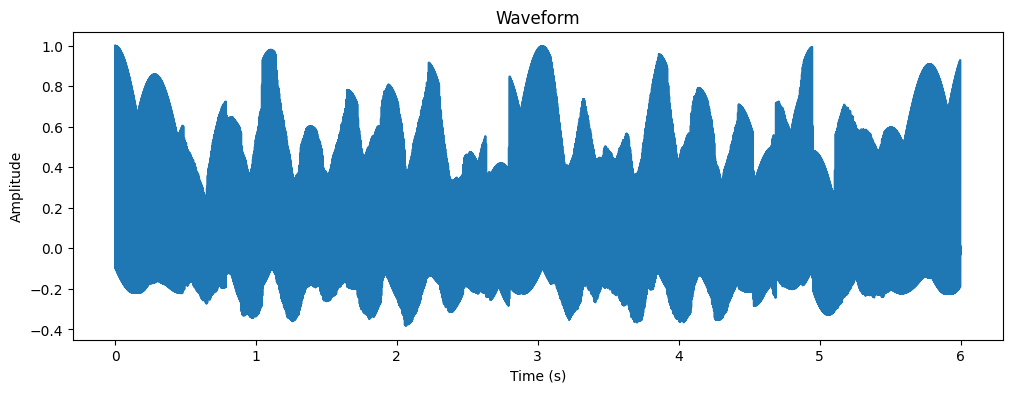

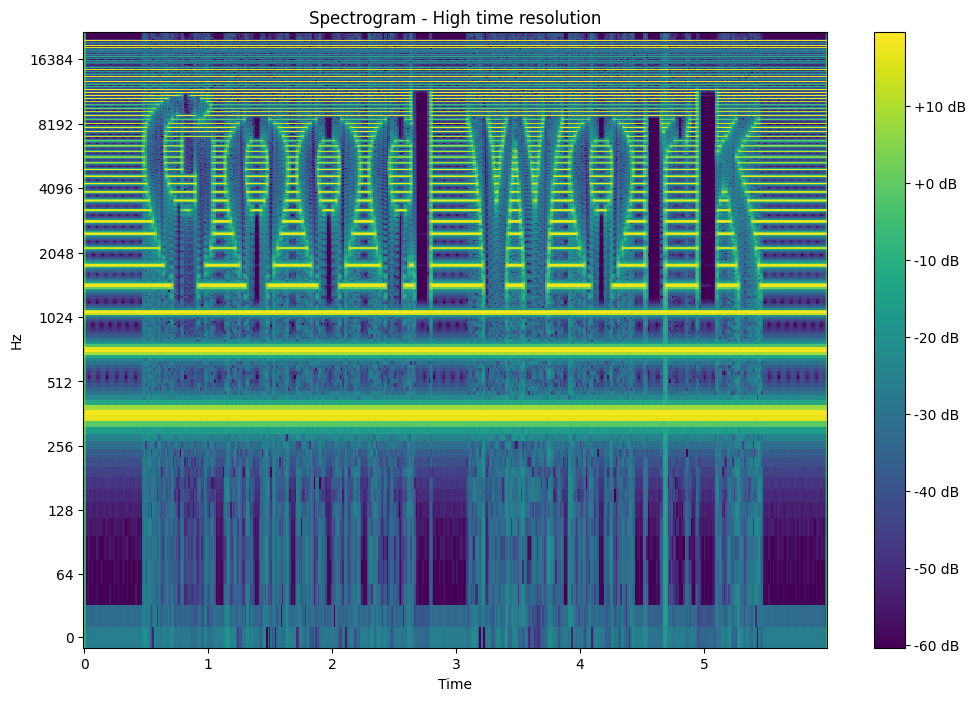

パラメータ: n_fft=2048, hop_length=512
周波数分解能 (Hz): 21.53
時間分解能 (秒): 0.0116
スペクトログラムの形状: (1025, 517)



In [7]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/dataset/audio/"

# 音声ファイルの読み込み
y, sr = librosa.load(path + "report_audio.wav", sr=None)

print("サンプリングレート:", sr)
print("音声の長さ:", len(y))

# 波形の表示
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(y)) / sr, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

# 異なるパラメータでスペクトログラムを表示
params = [
    (2048, 512, "High time resolution"),
]

for nfft, hop_length, title in params:
    plt.figure(figsize=(12, 8))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=nfft, hop_length=hop_length)))
    librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {title}')
    plt.show()

    print(f"パラメータ: n_fft={nfft}, hop_length={hop_length}")
    print(f"周波数分解能 (Hz): {sr/nfft:.2f}")
    print(f"時間分解能 (秒): {hop_length/sr:.4f}")
    print(f"スペクトログラムの形状: {D.shape}")
    print()

６．動画の変わり目を検出する

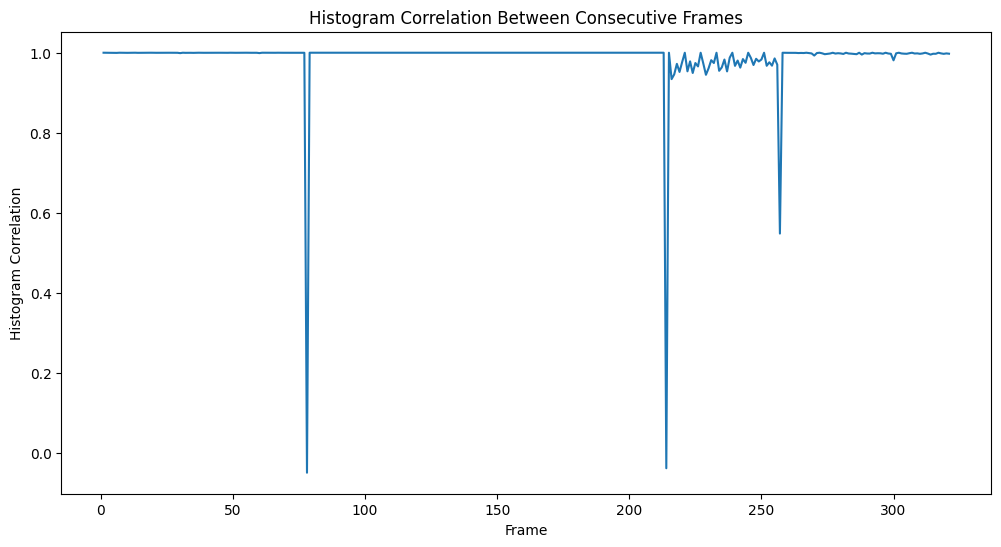

動画の変わり目と思われるフレーム:
フレーム 79
フレーム 215
フレーム 258


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Colab Notebooks/dataset/videos"

# 6. 動画の変わり目を検出する
video = cv2.VideoCapture(path + "/Detection.mp4")

def calculate_histogram(frame, bins=256):
    hist, _ = np.histogram(frame, bins=bins, range=[0, 256])
    return hist / np.sum(hist)  # 正規化

def histogram_correlation(hist1, hist2):
    # compareHist()のCORREL法を参考にした実装
    mean1, mean2 = np.mean(hist1), np.mean(hist2)
    numerator = np.sum((hist1 - mean1) * (hist2 - mean2))
    denominator = np.sqrt(np.sum((hist1 - mean1)**2) * np.sum((hist2 - mean2)**2))
    return numerator / denominator if denominator != 0 else 0

frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
correlations = []
prev_hist = None

for i in range(frame_count):
    ret, frame = video.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    current_hist = calculate_histogram(gray_frame)

    if prev_hist is not None:
        correlation = histogram_correlation(prev_hist, current_hist)
        correlations.append(correlation)

    prev_hist = current_hist

# a. 相関のグラフを描画
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(correlations) + 1), correlations)
plt.xlabel('Frame')
plt.ylabel('Histogram Correlation')
plt.title('Histogram Correlation Between Consecutive Frames')
plt.show()

# b. 動画の変わり目を検出
threshold = 0.9  # この閾値は調整が必要かもしれません
change_frames = [i+2 for i, corr in enumerate(correlations) if corr < threshold]

print("動画の変わり目と思われるフレーム:")
for frame in change_frames:
    print(f"フレーム {frame}")

video.release()

７．オブジェクト指向：Video クラスの作成

In [19]:
import cv2
import numpy as np

class Video:
    def __init__(self, path):
        self.path = path
        self.title, self.video_id = self._parse_filename(path)
        self.thumbnail = None

    @staticmethod
    def _parse_filename(path):
        filename = path.split('/')[-1]
        base, _ = filename.rsplit('.', 1)
        title, video_id = base.split(' - ')
        return title, video_id

    def create_thumbnail(self):
        cap = cv2.VideoCapture(self.path)
        ret, frame = cap.read()
        if ret:
            thumbnail_path = f"/content/drive/MyDrive/Colab Notebooks/dataset/images/output/{self.video_id}_thumb.jpg"
            cv2.imwrite(thumbnail_path, frame)
            self.thumbnail = thumbnail_path
        cap.release()

    def get_title(self):
        return self.title

    def get_id(self):
        return self.video_id

    def get_thumbnail(self):
        return self.thumbnail

    def get_path(self):
        return self.path

    def process_frame(self, frame, process_function):
        return process_function(frame)

    def create_processed_video(self, output_path, process_function):
        cap = cv2.VideoCapture(self.path)
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        fps = cap.get(cv2.CAP_PROP_FPS)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * 0.3)
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * 0.3)
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height), isColor=False)
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            processed_frame = self.process_frame(frame, process_function)
            resized_frame = cv2.resize(processed_frame, (width, height))
            out.write(resized_frame)
        cap.release()
        out.release()

def binary_threshold(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    return binary

def grayscale(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# 動作確認
video_path = "/content/drive/MyDrive/Colab Notebooks/dataset/videos/Cat - 66004.mp4"
video = Video(video_path)

# サムネイル作成
video.create_thumbnail()
print(f"サムネイル: {video.get_thumbnail()}")

# タイトルとID取得
print(f"Title: {video.get_title()}")
print(f"ID: {video.get_id()}")

# 二値化動画作成
output_path_binary = "/content/drive/MyDrive/Colab Notebooks/dataset/videos/output/Cat_binary.mp4"
video.create_processed_video(output_path_binary, binary_threshold)
print(f"二値化動画を保存しました: {output_path_binary}")

# グレースケール動画作成
output_path_grayscale = "/content/drive/MyDrive/Colab Notebooks/dataset/videos/output/Cat_grayscale.mp4"
video.create_processed_video(output_path_grayscale, grayscale)
print(f"グレースケール動画を保存しました: {output_path_grayscale}")

サムネイル: /content/drive/MyDrive/Colab Notebooks/dataset/images/output/66004_thumb.jpg
Title: Cat
ID: 66004
二値化動画を保存しました: /content/drive/MyDrive/Colab Notebooks/dataset/videos/output/Cat_binary.mp4
グレースケール動画を保存しました: /content/drive/MyDrive/Colab Notebooks/dataset/videos/output/Cat_grayscale.mp4


発展課題

 a．バッチ処理

In [21]:
import cv2
import numpy as np

class Video:
    def __init__(self, path):
        self.path = path
        self.title, self.video_id = self._parse_filename(path)
        self.thumbnail = None

    @staticmethod
    def _parse_filename(path):
        filename = path.split('/')[-1]
        base, _ = filename.rsplit('.', 1)
        parts = base.rsplit(' - ', 1)
        if len(parts) == 2:
            title, video_id = parts
        else:
            title, video_id = base, ""
        return title, video_id

    def create_thumbnail(self, output_dir):
        cap = cv2.VideoCapture(self.path)
        ret, frame = cap.read()
        if ret:
            if self.video_id:
                thumbnail_path = f"{output_dir}/{self.title}_{self.video_id}_thumb.jpg"
            else:
                thumbnail_path = f"{output_dir}/{self.title}_thumb.jpg"
            thumbnail = frame
            cv2.imwrite(thumbnail_path, thumbnail)
            self.thumbnail = thumbnail_path
        cap.release()

    def get_title(self):
        return self.title

    def get_id(self):
        return self.video_id

    def get_thumbnail(self):
        return self.thumbnail

    def get_path(self):
        return self.path

    def process_frame(self, frame, process_function):
        return process_function(frame)

    def create_processed_video(self, output_path, process_function):
        cap = cv2.VideoCapture(self.path)
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        fps = cap.get(cv2.CAP_PROP_FPS)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * 0.3)
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * 0.3)
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height), isColor=True)

        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, (width, height))
            processed_frame = self.process_frame(frame, process_function)
            out.write(processed_frame)

        cap.release()
        out.release()

def binary_threshold(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    return cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

def process_videos_in_directory(directory_path, output_video_directory, output_image_directory):
    import os
    for filename in os.listdir(directory_path):
        if filename.endswith('.mp4'):
            video_path = f"{directory_path}/{filename}"
            video = Video(video_path)

            print(f"処理中: {filename}")

            # 1. 動画の基本情報を取得
            cap = cv2.VideoCapture(video.get_path())
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fps = int(cap.get(cv2.CAP_PROP_FPS))
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            cap.release()

            print(f"サイズ: {width}x{height}, FPS: {fps}, フレーム数: {frame_count}")

            # 2. サムネイル作成
            video.create_thumbnail(output_image_directory)
            print(f"サムネイル: {video.get_thumbnail()}")

            # 3. タイトルとID取得
            print(f"タイトル: {video.get_title()}")
            if video.get_id():
                print(f"ID: {video.get_id()}")

            # 4. 二値化動画作成
            if video.get_id():
                output_path_binary = f"{output_video_directory}/{video.get_title()}_{video.get_id()}_binary.mp4"
            else:
                output_path_binary = f"{output_video_directory}/{video.get_title()}_binary.mp4"
            video.create_processed_video(output_path_binary, binary_threshold)
            print(f"二値化動画を保存しました: {output_path_binary}")

            print("処理完了\n")

# 動作確認
if __name__ == "__main__":
    directory_path = "/content/drive/MyDrive/Colab Notebooks/dataset/videos"
    output_video_directory = "/content/drive/MyDrive/Colab Notebooks/dataset/videos/output"
    output_image_directory = "/content/drive/MyDrive/Colab Notebooks/dataset/images/output"
    process_videos_in_directory(directory_path, output_video_directory, output_image_directory)

処理中: People - 84973.mp4
サイズ: 1280x720, FPS: 25, フレーム数: 241
サムネイル: /content/drive/MyDrive/Colab Notebooks/dataset/images/output/People_84973_thumb.jpg
タイトル: People
ID: 84973
二値化動画を保存しました: /content/drive/MyDrive/Colab Notebooks/dataset/videos/output/People_84973_binary.mp4
処理完了

処理中: Cat - 66004.mp4
サイズ: 1280x720, FPS: 29, フレーム数: 294
サムネイル: /content/drive/MyDrive/Colab Notebooks/dataset/images/output/Cat_66004_thumb.jpg
タイトル: Cat
ID: 66004
二値化動画を保存しました: /content/drive/MyDrive/Colab Notebooks/dataset/videos/output/Cat_66004_binary.mp4
処理完了

処理中: Dubrovnik - 12866.mp4
サイズ: 1280x720, FPS: 25, フレーム数: 176
サムネイル: /content/drive/MyDrive/Colab Notebooks/dataset/images/output/Dubrovnik_12866_thumb.jpg
タイトル: Dubrovnik
ID: 12866
二値化動画を保存しました: /content/drive/MyDrive/Colab Notebooks/dataset/videos/output/Dubrovnik_12866_binary.mp4
処理完了

処理中: Flowers - 66823.mp4
サイズ: 1280x720, FPS: 23, フレーム数: 147
サムネイル: /content/drive/MyDrive/Colab Notebooks/dataset/images/output/Flowers_66823_thumb.jpg
タイトル: Flowers


c．その他の動画像処理（グレースケール，二値化以外）を行う

In [13]:
import cv2

# 入力動画のパス
path = "/content/drive/MyDrive/Colab Notebooks/dataset/videos"

video_path = "/People - 84973.mp4"

input_path = path + video_path

# 出力動画のパス
output_path = "/content/drive/MyDrive/Colab Notebooks/dataset/videos/output//People - 84973 edge_detected.mp4"

# 入力動画を開く
cap = cv2.VideoCapture(input_path)

# フレームの幅と高さを取得
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# コーデックを定義し、VideoWriterオブジェクトを作成
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 20.0, (frame_width, frame_height), isColor=False)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # フレームをグレースケールに変換
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # エッジ検出（Canny）を適用
    edges = cv2.Canny(gray_frame, 100, 200)

    # エッジ検出後のフレームを出力動画に書き込む
    out.write(edges)

# すべてのリソースを解放
cap.release()
out.release()
